## HW4 Classification of Green Fluorescent Protein
### Darian Yang

You can start with basic models, and then try your best to optimize your predictions by using more sophisticated models, feature engineering, and fine-tuning the hyperparameters. The grade of this homework will be based on the score you get on Kaggle. 

There is no specific requirement for a written summary for this homework, but please leave some necessary notes/comments in your submission to help the grader understand your workflow.

In this work you will predict the brightness level binarized for classification between high brightness (class 1) and low brightness (class 0) for a set of mutants of Green Fluorescent Protein

Please explore descriptors/featurisations for amino acid sequences.
The performance will be measured using F1 score metric (sklearn.metrics.f1_score)

Overfitting is prevented by using a public and private leaderboard..

#### Overall:
* Get data from Kaggle
* Make features
* Build classification models using only Scikit Learn!
* Submit solution for autograding to Kaggle
* Submit IPYNB file to canvas

#### Dataset Description
This dataset provides quantitative measurements of the brightness level binarized for classification between high brightness (class 1) and low brightness (class 0) for a set of mutants of Green Fluorescent Protein

File descriptions
* X_train_kaggle.csv - the training set: amino acid sequences Id column
* y_train_kaggle.csv - the training set: brightness class for training with Id column
* X_test_kaggle.csv - the test set: amino acid sequences with Id column that you should predict
* y_sample_submission.csv - a sample submission file in the correct format

To work with amino acid sequence for building a ML model you have to perform a feature engineering.
* a good start -subfolder "descriptors" contains descriptors for amino acids and papers describing their construction

#### Submission Format
For every molecule in the dataset, submission files should contain two columns: Id and ACTIVE.

The file should contain a header and have the following format:

```
Id,Brightness_Class
1,1
```

In [5]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [6]:
X_train = pd.read_csv("X_train_kaggle.csv", index_col=1).to_numpy()
y_train = pd.read_csv("y_train_kaggle.csv", index_col=1).to_numpy()
X_test = pd.read_csv("X_test_kaggle.csv", index_col=1).to_numpy()

In [7]:
TEST_ID = pd.read_csv("X_test_kaggle.csv",index_col=1).index

In [5]:
TEST_ID[:10]

Int64Index([50579, 37987, 53977, 10677, 35653, 53275, 7765, 3759, 39236,
            48246],
           dtype='int64', name='Id')

In [6]:
X_train.shape

(33029, 1)

In [7]:
y_train

array([[0],
       [0],
       [0],
       ...,
       [0],
       [1],
       [1]])

First get rid of the 225 aa length sequences, only keeping lengths of 237.

In [8]:
to_filter = []
for seq in X_train[:,0]:
    if len(seq) < 237:
        to_filter.append(False)
    else:
        to_filter.append(True)

len(to_filter)

33029

In [9]:
X_train = X_train[to_filter]
y_train = y_train[to_filter]

Perhaps doing something like MSA and only looking at the non-conserved region to reduce dimensions could be helpful?

In [10]:
X_train

array([['SKGEELFTGVVPILVELDGDVNGHKFSVSGEGEGDATYGKLTLKFISTTGKLPVPWPTLVTTLSYGVQCFSRYPDHTKQHDFFKSAMPEGYVQERTIFFKDDGNYKTRAEVKSEGDTLVNRIELKGIDFKEDGNILGHKLEYNYNSHNVYIMADKQKNGIKVNFKIRHNIEDGSVQLADHYQQNTPIGDGPVLLPDNHYLSTQSALSKDPNEKRDHMVLLEFVTAAGITHGMDELYK'],
       ['SKGEELFTGVVPILVELDGDVNGHKFSVSGEGEGDATYGKLTLKFICTTGKLPVPWPTLVTTLSYGVQCFSRYPDHMKQHDFFKSAMPEGYAQERTIFFKDDGNYKTRAEVKFEGDTLVNRIELKGIDFKEDGNILGHKLEYNYNSHNVYNMADKQKNGIKVNFKIRHNTEDGSVQLADHYQQNTPIGDGPVLLPDNHYLSTPSALSKDPNEERDHMVLLEFVTAAGITHGMDELYK'],
       ['SKGEELFTGVVPILVELDGDVNGHKFSVSGEGEGDATYGKLTLKFIRTTGKLPVPWPTLVTTLSYGVQCSSRYPDHMKQHDLFKSAMPEGYAQERTIFSKDDGNYETRAEVRFEGDALVNRIELKGIDFKEDGNILGHKLEYNYNSHNVYIMADKQKNGIKVNFKIRHNIEDGSEQLADHYQQNTPIGDGPVLLPDDHYLSTQSALSKDPNEKRDHMVLLEFVTAAGITHGMDELYK'],
       ...,
       ['SKGEELFTGVVPVLVELDGDVNGHKFSVSGEGEGDATYGKLTLKLICTTGKLPVPWPTLVTTLSYGVQCFSRYPDHMKQHDFFKSAMPEGYVQERTIFFKDDGNYKTRAEVMFEGDTLVNRIELKGIDFKEDGNILGHKLEYNYNSHNVYIMADKQKNGIKVNFKIRHNIEDGSVQLADHYQQNTPIGDGPVLLPDNHYLSTQSALSEDPNEKRDRMVLLEFVTAAGIT

In [11]:
# I want to find the most commonly substituted GFP sequence positions
common = []

# I can't go through all of the sequences for times sake, so every 300 for now
for seq1 in X_train[::300,0]:
    for seq2 in X_train[:,0]:
        common.append([i for i in range(len(X_train[1,0])) if seq1[i] != seq2[i]])
len(common)

3227016

In [12]:
common_flat = [item for sublist in common for item in sublist]

In [13]:
len(common_flat)

25148613

In [14]:
hist, edges = np.histogram(common_flat, bins=237)
midpoints = (edges[:-1] + edges[1:]) / 2

In [15]:
hist

array([ 78104,  11544, 183485,  48464, 110942, 341076, 150993,  12688,
       108658, 105246,  10088, 155408, 164819,  97873, 112672, 101387,
       178749,  41502,  79731,  59334, 153523,  43136,  61984, 169185,
       159339, 181633, 109008,  79198,   9672,  82199,   7592, 147084,
         8216, 185206,   8216, 243446, 149336,  11440, 107401,  36920,
        54080,  61949, 138220, 184606, 211132, 140309, 176907,  75526,
        40599, 179279,  64544,  10920, 103447,  38216,  98556,  11232,
        76559,  37648,  46280, 161516,  42744,  73543,  74351,  40768,
        12272, 135221,  68887,  38584, 179476, 182004,  22464, 136046,
        14352, 114112,  48464, 228292, 215354,  90007,      0, 173928,
        98020, 131019, 153457, 115975, 128669,  14560, 231425,  15080,
        64792,   8112,  72794, 116354,  32656, 106736,  16744,  90348,
       103097, 138582, 205464, 176141,  53560,  73326,  10920, 272034,
        74334, 186836, 139775,  18616,  11440,  44200, 106124, 225910,
      

<BarContainer object of 237 artists>

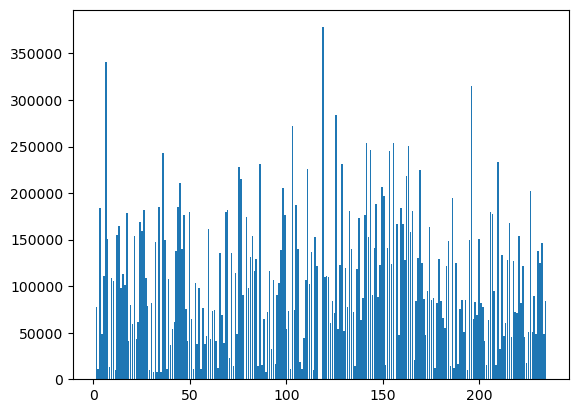

In [16]:
plt.bar(midpoints, hist)

In [17]:
for i, count in enumerate(hist):
    if count > 250000:
        print(f"{count} at {i + 1}")

341076 at 6
272034 at 104
378117 at 120
284354 at 127
253701 at 143
253536 at 157
250082 at 165
314566 at 198


Overall the mutations seem to be pretty evenly dispersed, if it were the case that only a few residues were being tested then I would have tried focusing on those but this doesn't seem to be the case.

### Okay, time to build in some features using the descriptors. 
Let's start with just one file, I'll go with physical.csv.

My goal here is to build a large 2d array where each row is a GFP sequence and the number of columns will be of size 237 (aa) by n features. At first I thought it would be good to keep the columns to 237 to match the residues and add features depth-wise, but now I think it's best to make a big 2d array.

In [18]:
!ls

descriptors	      LogisticRegression.csv  X_train_kaggle.csv
hw4_dty.ipynb	      RidgeRegression.csv     y_sample_submission.csv
LinearRegression.csv  X_test_kaggle.csv       y_train_kaggle.csv


In [8]:
def process_feature(feature_name):
    """
    Output a df with single aa code as index and cols as features.
    """
    features = pd.read_csv(f"descriptors/{feature_name}.csv", skiprows=2, index_col=1)
    return features.drop("AA_3", axis=1)
    
f = process_feature("Physical")
print(np.shape(f))
f.loc["A"].to_numpy()

(20, 2)


array([-2.9 , -1.03])

In [20]:
f

Vol  Hydro
AA_1             
A    -2.90  -1.03
R     2.41   1.31
N    -0.68   0.79
D    -0.92   1.23
C    -1.89   0.15
Q     0.36   1.09
E     0.16   1.28
G    -4.04   0.01
H     0.83   1.15
I     0.51  -1.32
L     0.52  -1.40
K     0.92   1.23
M     0.92  -1.42
F     2.22  -1.47
P    -1.25  -0.64
S    -2.36   0.38
T    -1.19   0.28
W     4.28  -0.18
Y     2.75  -0.18
V    -0.65  -1.27

In [9]:
def feature_array_from_seqs(sequences, features):
    """
    Take a 1d GFP sequences array and features (df) and return features 
    for each amino acid in the input sequence.
    """
    n_features = np.shape(features)[1]
    # make final feature array: sequence = 237 and features are 20 aa by n features
    feature_array = np.zeros((len(sequences), len(sequences[0]) * n_features))

    # loop through sequences
    for i, seq in enumerate(sequences):
        # loop through each residue in the sequence
        for j, aa in enumerate(seq):
            # add the feature float values to array at appropriate indicies
            feature_array[i, j+j : j+j+n_features] = features.loc[aa].to_numpy()
    
    return feature_array

In [22]:
# test
fa = feature_array_from_seqs(X_train[:10,0], f)
fa[0].shape

(474,)

In [23]:
X_train[0,0]

'SKGEELFTGVVPILVELDGDVNGHKFSVSGEGEGDATYGKLTLKFISTTGKLPVPWPTLVTTLSYGVQCFSRYPDHTKQHDFFKSAMPEGYVQERTIFFKDDGNYKTRAEVKSEGDTLVNRIELKGIDFKEDGNILGHKLEYNYNSHNVYIMADKQKNGIKVNFKIRHNIEDGSVQLADHYQQNTPIGDGPVLLPDNHYLSTQSALSKDPNEKRDHMVLLEFVTAAGITHGMDELYK'

Building the feature array works. Now to do this for every sequence.

In [ ]:
X_train_fa = feature_array_from_seqs(X_train[:,0], process_feature("Physical"))

In [ ]:
X_train_fa[:5]

In [ ]:
X_test_fa = feature_array_from_seqs(X_test[:,0], process_feature("Physical"))

In [ ]:
X_test_fa.shape

Okay, so now maybe I can build a model using this set of features for each sequence. Note that this took a while to build.

In [54]:
from sklearn import linear_model

/ihome/lchong/dty7/Apps/anaconda3/envs/ml/lib/python3.8/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.1
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [55]:
def worker(model, save_to="submission.csv", linear=False):
    model = model.fit(X_train_fa, y_train[:,0])
    y_test = model.predict(X_test_fa)

    # for linear regression and etc., predicted values are not binary
    if linear:
        ret = {"Id":TEST_ID, "Brightness_Class":(y_test>0.5).astype(int)}
    else:
        ret = {"Id":TEST_ID, "Brightness_Class":y_test}
    ret = pd.DataFrame(data=ret)
    ret.set_index("Id")
    ret.to_csv(save_to, index=False)

Let's try linear, logistic, and ridge.

In [ ]:
worker(linear_model.LinearRegression(), save_to="LinearRegression.csv", linear=True)

In [ ]:
worker(linear_model.LogisticRegression(max_iter=1000), save_to="LogisticRegression.csv")

In [ ]:
worker(linear_model.RidgeClassifier(), save_to="RidgeRegression.csv")

My scores were not too good (<baseline), logistic performed the best (slightly). However; this was expected as I am using simple models with only 2 features.

## To get better peformance, I can:
* Using more/different descriptors (features):
    * To narrow it down, I could also to process all descriptors and reduce dimensionality by PCA.
* Using more advanced classification methods such as SVMs or decision trees.

To look at all descriptors, I need to expand my previously made process_feature function for multiple descriptor csvs.

In [42]:
def process_features(feature_names):
    """
    Input list of feature names.
    Output a df with single aa code as index and cols as features.
    """
    # append the 1 letter AA codes as the all_features df index labels
    df = pd.read_csv("descriptors/template.csv", skiprows=2, index_col=1)
    df = df.drop("AA_3", axis=1)
    
    # go through each feature requested
    for feat in feature_names:
        features = pd.read_csv(f"descriptors/{feat}.csv", skiprows=2, index_col=1)
        features = features.drop("AA_3", axis=1)
        
        # add features as rows to all_features df
        for idx, colname in enumerate(features.columns):
            df[colname] = features.iloc[:,idx]
    
    return df

In [45]:
process_features(["Physical", "Z-scale"])

Vol  Hydro  Z(1)  Z(2)  Z(3)
AA_1                               
A    -2.90  -1.03  0.07 -1.73  0.09
R     2.41   1.31  2.88  2.52 -3.44
N    -0.68   0.79  3.22  1.45  0.84
D    -0.92   1.23  3.64  1.13  2.36
C    -1.89   0.15  0.71 -0.97  4.13
Q     0.36   1.09  2.18  0.53 -1.14
E     0.16   1.28  3.08  0.39 -0.07
G    -4.04   0.01  2.23 -5.36  0.30
H     0.83   1.15  2.41  1.74  1.11
I     0.51  -1.32 -4.44 -1.68 -1.03
L     0.52  -1.40 -4.19 -1.03 -0.98
K     0.92   1.23  2.84  1.41 -3.14
M     0.92  -1.42 -2.49 -0.27 -0.41
F     2.22  -1.47 -4.92  1.30  0.45
P    -1.25  -0.64 -1.22  0.88  2.23
S    -2.36   0.38  1.96 -1.63  0.57
T    -1.19   0.28  0.92 -2.09 -1.40
W     4.28  -0.18 -4.75  3.65  0.85
Y     2.75  -0.18 -1.39  2.32  0.01
V    -0.65  -1.27 -2.69 -2.53 -1.29

This works for multiple descriptors now. Next I will try all of them and then do some feature selection to prune the list.

In [51]:
all_desc = process_features(["DPPS", "MS-WHIM", "Physical", "ST-scale", "T-scale", "VHSE-scale", "Z-scale"])

I will try first using all of the features.

In [52]:
X_train_fa = feature_array_from_seqs(X_train[:,0], all_desc)
X_test_fa = feature_array_from_seqs(X_test[:,0], all_desc)

In [56]:
worker(linear_model.LogisticRegression(), save_to="LogisticRegression_allf.csv")

/ihome/lchong/dty7/Apps/anaconda3/envs/ml/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


The score got worse when using all descriptors compared to using just 'Physical'. This makes sense since I likely added poor features and unnecessarily increased dimensionality and added noise.

So, which features are important here in terms of explaining the variance? For now (and for ease) I will just use the AA descriptor dataset for this part. If needed I can use the full per residue feature array.

In [57]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

In [82]:
scaler = StandardScaler()
scaler.fit(all_desc)
all_desc_scaled = scaler.transform(all_desc)
desc_names = all_desc.columns

In [83]:
df = pd.DataFrame(all_desc_scaled, columns=all_desc.columns)
df

D1        D2        D3        D4        D5        D6        D7  \
0  -0.387243 -1.189422 -0.283470  0.219839 -1.301647 -0.785861  0.006744   
1   0.756624  1.706166 -2.234068 -0.624049  1.011498  1.421377 -1.566828   
2  -0.831869  0.768508  0.192780 -0.079802 -0.486861  0.659132 -0.987546   
3  -2.507766  1.371584  0.815958  0.219839 -0.687912  0.911655 -1.272864   
4   0.080185  0.462840  1.732992 -0.416135 -0.480512 -0.570749  0.537608   
5  -0.178230  0.479362 -0.288536  0.421638  0.082431  0.902302 -0.944316   
6  -2.047940  0.268699 -0.496262  0.849698 -0.048781  1.173531 -1.182946   
7  -1.086483 -2.065120 -1.504493  0.323796 -2.423300  0.883597 -0.365034   
8   0.277796  1.107222 -0.334135 -1.156066  0.338506  0.528194 -0.335638   
9   0.726222 -1.292688  0.005320  0.696819  0.571302 -2.127974  1.544003   
10  0.623616 -1.061371  0.000253  0.825237  0.554372 -1.239467  1.334769   
11  0.939035  0.636327 -2.168203 -0.526207  0.586117  0.963095 -1.068818   
12  0.733823 -0.003924  0.613298  0.605092  0.590349 -0.262110  0.921491   
13  1.018839  0.347181  1.125014  0.433869  1.062290 -0.140524  1.486939   
14  0.171390 -1.193552  0.897022 -3.553198 -0.802194 -0.285491  0.120871   
15 -0.668459 -0.078276  0.537301 -0.422250 -1.210645  0.065235 -0.716062   
16 -0.208632 -0.272417  0.066118 -0.189875 -0.584212 -0.729745 -0.425556   
17  1.474866  0.735463  0.851423  1.222721  1.970194  0.415962  1.301915   
18  0.798427  0.520669  0.582899  0.556171  1.248527  0.345816  0.641360   
19  0.315798 -1.247251 -0.111209  0.592862  0.010476 -2.127974  0.969908   

          D8        D9       D10  ...     VHSE2     VHSE3         VHSE4  \
0  -0.993002 -1.156349 -0.009295  ... -1.138434 -1.383601 -9.450797e-01   
1   2.653147  2.630559  0.068975  ...  1.488327  1.271846  1.304621e+00   
2  -0.439357  1.032305 -0.185401  ...  0.000513 -0.378837  7.088098e-01   
3   0.054969  0.740087 -0.146266  ...  0.687986 -0.419848 -1.027261e-02   
4  -1.178869 -1.013221  1.536530  ... -1.713038 -0.471111 -2.157247e-01   
5  -0.332583  1.151578  0.832104  ...  0.123642  0.185061  1.643617e-01   
6  -0.269309  0.841469  1.252803  ...  0.410944  0.103040  3.698138e-01   
7  -1.578284 -1.287548 -0.743072  ... -1.569387 -2.695945  2.342154e+00   
8  -0.043896  0.262996  0.147245  ... -0.256007  0.379862  1.951795e-01   
9   0.070787 -0.655403 -0.743072  ... -0.143138  0.308093 -1.849069e+00   
10  0.019378 -0.613658 -1.770361  ...  0.072339  0.267083 -8.218084e-01   
11  0.810299  1.306632 -1.613822  ...  0.718768  0.718201  8.218084e-01   
12 -0.344446 -0.589803 -1.065934  ... -0.543309  0.441378  1.140488e-17   
13  0.446475 -0.834312 -0.273454  ...  0.626421  0.984771 -1.643617e-01   
14  0.478112 -0.995330  1.751772  ... -0.173920 -0.512122  5.136303e-02   
15 -0.957411 -0.076931  0.675565  ... -0.881914 -1.096525 -4.211768e-01   
16 -0.838773  0.101978  0.078759  ... -0.522787 -0.563385 -1.088896e+00   
17  1.688223 -0.136567 -1.388796  ...  2.114235  1.835744  7.704454e-01   
18  1.312535  0.149687  1.301722  ...  1.642238  1.200078  7.499002e-01   
19 -0.557995 -0.858167  0.294000  ... -0.943479 -0.173783 -1.962068e+00   

           VHSE5     VHSE6     VHSE7     VHSE8      Z(1)      Z(2)      Z(3)  
0   2.049596e-02 -0.932173  0.370010 -0.491851  0.023078 -0.833101  0.050936  
1   1.588437e+00  1.508501  1.334809  0.850493  0.983825  1.211761 -1.992288  
2  -5.636388e-01  0.872695  0.749771 -0.819752  1.100072  0.696937  0.485049  
3  -2.746458e+00  1.344422  0.031305  0.573827  1.243672  0.542971  1.364850  
4   3.271043e-17  1.231617 -1.651960 -0.194691  0.241896 -0.467431  2.389356  
5   9.223180e-02  0.431733 -0.204763 -0.420123  0.744493  0.254285 -0.661009  
6  -2.213563e+00 -0.173308  0.934520  0.020494  1.052206  0.186924 -0.041675  
7  -5.431428e-01 -1.209057  2.063539 -1.373085  0.761589 -2.579654  0.172487  
8   5.226469e-01  1.313657  0.955048  0.666049  0.823131  0.836469  0.641329  
9   3.074393e-01 -1.650019 -0.163708 -0.133210 

Text(0, 0.5, 'cumulative explained variance')

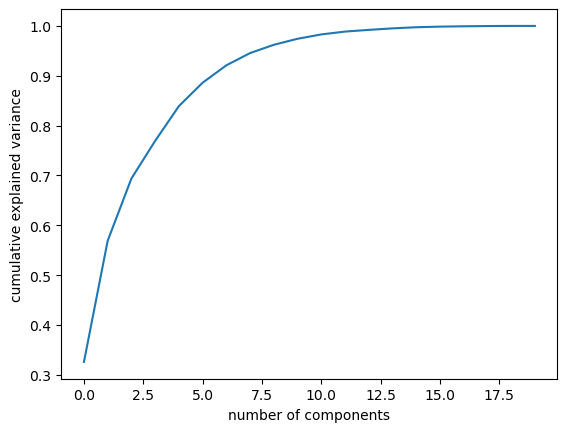

In [84]:
pca = PCA().fit(df)
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance')

Text(0, 0.5, 'PC2')

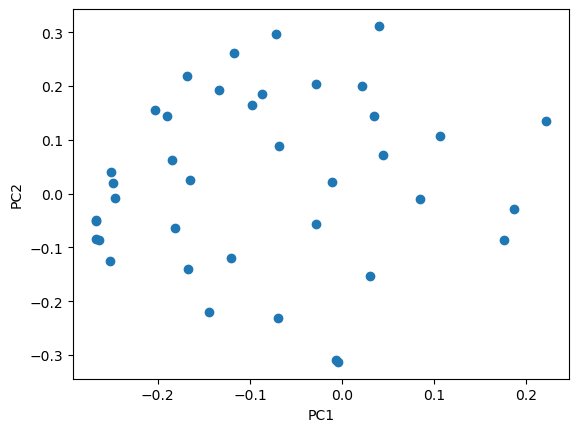

In [85]:
plt.scatter(pca.components_[0], pca.components_[1])
plt.xlabel("PC1")
plt.ylabel("PC2")

In [86]:
np.cumsum(pca.explained_variance_ratio_)

array([0.32593978, 0.56898931, 0.69384992, 0.76932601, 0.83909098,
       0.88604282, 0.92097889, 0.94553659, 0.96213473, 0.97421195,
       0.98293472, 0.98864835, 0.99207033, 0.99507245, 0.99736711,
       0.99860471, 0.99925431, 0.99975523, 1.        , 1.        ])

So about 6 PCs can explain >85% of the total variance. Let's go with these.

In [92]:
pca = PCA(n_components=6).fit(df)

In [95]:
pca_fit = pca.fit_transform(df)

In [98]:
pca_fit.T[0]

array([ 5.38142709, -6.07815886,  0.29425645,  0.90978366,  2.9307907 ,
       -1.35030822, -0.58869441,  6.98154606, -2.79300897,  1.1929171 ,
        0.47975548, -3.45148352, -0.90263446, -3.14255241,  1.74080721,
        3.58846288,  2.7337501 , -6.38231385, -4.68043297,  3.13609095])

In [99]:
# make a feature key df in the same format as previous
# append the 1 letter AA codes as the all_features df index labels
df = pd.read_csv("descriptors/template.csv", skiprows=2, index_col=1)
df = df.drop("AA_3", axis=1)

# add pcs as rows to df
for idx, pc in enumerate(pca_fit.T):
    df[idx] = pc
df

0         1         2         3         4         5
AA_1                                                            
A     5.381427 -0.413375  0.952966  1.129120  0.142331 -1.009810
R    -6.078159  4.134772  4.201360 -1.514076  1.246131 -0.295475
N     0.294256  3.329894 -1.439012 -0.194668 -1.367692  0.027704
D     0.909784  4.828819 -3.625491 -0.496544 -2.056743  0.523830
C     2.930791 -0.858116 -1.615959 -1.310821  1.422037  3.616872
Q    -1.350308  2.179967 -0.027269 -0.443281 -0.771567  0.263838
E    -0.588694  4.226095 -0.864940  0.018303 -1.580783  0.205055
G     6.981546  2.748276  3.116508  4.908367  1.310309  0.150355
H    -2.793009  1.947561 -1.827371  0.041710  1.684318 -1.096509
I     1.192917 -4.826131  1.179024 -1.542548 -1.880189 -1.295438
L     0.479755 -4.030996  2.020204 -0.019367 -1.767653 -0.270023
K    -3.451484  2.371466  4.691471 -1.041212  0.484335 -0.043244
M    -0.902634 -3.297491  1.749773 -0.687743 -0.518337  3.096691
F    -3.142552 -4.077997 -1.128807  1.819689  0.404011  1.143868
P     1.740807 -1.866683 -1.947415 -2.063199  5.233604 -1.208990
S     3.588463  1.658948 -1.404024 -0.564031  0.125613 -0.374645
T     2.733750 -0.009718 -1.077576 -1.779748 -1.074884 -1.486672
W    -6.382314 -2.917983 -2.105649  2.891447 -0.295466 -1.694865
Y    -4.680433 -1.413132 -1.778430  2.052108  0.272185  0.726476
V     3.136091 -3.714177  0.930638 -1.203506 -1.011561 -0.979016

In [100]:
X_train_fa = feature_array_from_seqs(X_train[:,0], df)

In [101]:
X_test_fa = feature_array_from_seqs(X_test[:,0], df)

In [102]:
worker(linear_model.LogisticRegression(), save_to="LogisticRegression_pca.csv")

/ihome/lchong/dty7/Apps/anaconda3/envs/ml/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Overall, I got the best score from using just the physical descriptors. Maybe I can find a good combination from random educated guessing.

### Now I will try some other classification models:

Starting with SVMs and decision trees since we went over these in class.

I will start with a simple linear SVM.

Now I will try using the RBF kernel and CV to find the best C and $\gamma$ parameters.

Next, how do decision trees fair for this classification problem?